In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load cleaned data frames

In [2]:
from etl import load_debt, load_receipt, load_filer, load_expense, load_contributions

In [3]:
filer = load_filer()
debt = load_debt()
receipt = load_receipt()
expense = load_expense()
contrib = load_contributions()

Loading data frame from data/filer.pkl.
Data frame loaded.
Loading data frame from data/debt.pkl.
Data frame loaded.
Loading data frame from data/receipt.pkl.
Data frame loaded.
Loading data frame from data/expense.pkl.
Data frame loaded.
Loading data frame from data/contrib.pkl.
Data frame loaded.


# Example queries

In [4]:
filer.groupby('Office').count().head()

,Filer Identification Number,Election Year,Election Cycle,Amended Report Indicator,Termination Indicator,Filer Type,Filer Name,District,Party,Filer Address 1,...,Phone Number,Beginning Balance,Monetary,In-Kind,Filer Location 1,Filer Location 2,type,filer_id,address,geometry
Office,,,,,,,,,,,,,,,,,,,,,
,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,...,2055,2055,2055,2055,2055,2055,2055,2055,2055,1999
CCJ,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
CPJ,171,171,171,171,171,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171
CPJA,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
CPJP,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61


In [5]:
filer.groupby(['filer_id', 'Filer Name']).count().sort_index(level='filer_id').head(5)

,,Filer Identification Number,Election Year,Election Cycle,Amended Report Indicator,Termination Indicator,Filer Type,Office,District,Party,Filer Address 1,...,County,Phone Number,Beginning Balance,Monetary,In-Kind,Filer Location 1,Filer Location 2,type,address,geometry
filer_id,Filer Name,,,,,,,,,,,,,,,,,,,,,
2000081,FirstEnergy Corp. Political Action Committee,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2000115,Friends of Senator Don White,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2000127,FRIENDS OF KATE HARPER,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2000142,LOCAL 0009 BRICKLAYERS & ALLIED CRAFTWORKERS PA PAC,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2000171,EASTERN PA LABORERS' LPL,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [6]:
contrib.groupby(['Filer Identification Number',
                 'Election Year',
                 'Election Cycle']
               ).sum().sort_values('amount', ascending=False).head()

,,,amount
Filer Identification Number,Election Year,Election Cycle,
2005249,2017,3,20170531.00
8200581,2017,1,1393814.80
2004252,2017,3,1218981.90
8600230,2017,3,1194106.88
8200581,2017,3,972314.25


# Use case examples

Focus on the `debt`, `contrib`, `expense`, `filer`, `receipt` dataframes

## Local activity

Find nearby activity, unfettered by time.

In [7]:
from geopy.distance import great_circle

In [8]:
from geopy.geocoders import Nominatim

In [9]:
geolocator = Nominatim()
location = geolocator.geocode('Ebensburg, PA')
address = (location.latitude, location.longitude)

In [10]:
address

(40.4851941, -78.7249573)

In [11]:
def get_dist(x, address=None):
    lat, long = x['lat'], x['long']
    return great_circle(address, (lat, long)).miles
    
def get_distances(address, df):
    return df.apply(get_dist, address=address, axis=1)

## Timeseries visualizations

In [12]:
ts = contrib[['Contribution Date', 'amount', 'filer_id']].copy()
ts.sort_values(['Contribution Date', 'filer_id'], inplace=True)

In [13]:
# TODO: be cautious about NaT values

def reshape(df, index=None):
    df = df.set_index(index)
    return df.iloc[:, :-1].fillna(0)

ts_df = ts.groupby('filer_id').apply(reshape, index='Contribution Date')

In [14]:
ts_df.groupby('filer_id').count().sort_values('amount', ascending=False).head()

,amount
filer_id,
8600230,28132
8200581,17589
7900477,9749
2002281,7561
7900366,6465


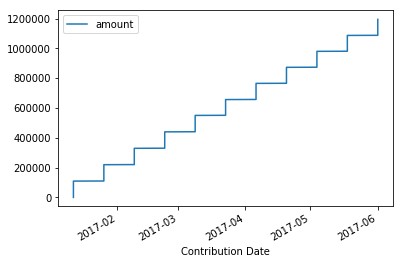

In [15]:
ts_df.xs('8600230').cumsum().plot()

In [16]:
expense[expense.filer_id=='8200581']

,Filer Identification Number,Election Year,Election Cycle,Name,Expense Address 1,Expense Address 2,Expense City,Expense State,Expense Zip Code,Expense Date,Expense Amount,Expense Description,Expense Location 1,Expense Location 2,amount,filer_id,address,geometry
73,8200581,2017,3,Dayna Flood,2751 Croydon St,,Philadelphia,PA,191371528,2017-05-26,$45.00,Non-fed GOTV phone banks,"2751 Croydon St\nPhiladelphia, PA 191371528\n(...","Philadelphia, PA 191371528\n(39.996078, -75.07...",45.0,8200581,2751 Croydon St Philadelphia PA 191371528,POINT (-75.076904 39.996074)
806,8200581,2017,3,Vincent Paley Jr.,132 Pierce Street,,Philadelphia,PA,191481910,2017-05-23,$125.00,Primary election day - trash removal at EOM,"132 Pierce Street\nPhiladelphia, PA 191481910\...","Philadelphia, PA 191481910\n(39.925817, -75.14...",125.0,8200581,132 Pierce Street Philadelphia PA 191481910,POINT (-75.148363 39.92578)
1371,8200581,2017,1,Lazaretto Ballroom,Morton Ave,Capo 801,Folsom,PA,190332994,2017-03-20,$5100.00,In-kind contrib: Jack Whelan for PA Judge,"Morton Ave\nFolsom, PA 190332994\n","Capo 801\nFolsom, PA 190332994\n",5100.0,8200581,Morton Ave Capo 801 Folsom PA 190332994,None
2889,8200581,2017,3,River Wards United,417 Girard Avenue,,Philadelphia,PA,19125,2017-05-09,$26400.00,Contribution for non-fed GOTV Operations,"417 Girard Avenue\nPhiladelphia, PA 19125\n(39...","Philadelphia, PA 19125\n(39.977355, -75.125838)",26400.0,8200581,417 Girard Avenue Philadelphia PA 19125,POINT (-75.129925 39.970387)
2941,8200581,2017,3,Strassheim Graphic & Design Press Corp,333 N 15th St,,Philadelphia,PA,191021034,2017-05-03,$1738.80,Indep Expend: Butkovitz for Controller signs,"333 N 15th St\nPhiladelphia, PA 191021034\n(39...","Philadelphia, PA 191021034\n(39.953337, -75.16...",1738.8,8200581,333 N 15th St Philadelphia PA 191021034,POINT (-75.163827 39.959349)
5790,8200581,2017,1,DeAngelo for Assembly,105 Limewood Drive,,Hamilton,NJ,86902212,2017-03-24,$2500.00,Non-fed fundraiser 3/29/17,"105 Limewood Drive\nHamilton, NJ 86902212\n(40...","Hamilton, NJ 86902212\n(40.223999, -74.743202)",2500.0,8200581,105 Limewood Drive Hamilton NJ 86902212,POINT (-74.646835 40.211306)
6947,8200581,2017,2,Friends of Judge Maria Mclaughlin,1500 JFK Blvd.,PO Box 58381,Philadelphia,PA,191021710,2017-04-26,$15178.00,Donation for lawn signs,"1500 JFK Blvd.\nPhiladelphia, PA 191021710\n","PO Box 58381\nPhiladelphia, PA 191021710\n",15178.0,8200581,1500 JFK Blvd. PO Box 58381 Philadelphia PA 19...,None
6948,8200581,2017,2,Committee to Elect Stella Tsai Judge,1500 JFK Blvd.,PO Box 58381,Philadelphia,PA,191021710,2017-04-28,$5000.00,Non-fed contribution,"1500 JFK Blvd.\nPhiladelphia, PA 191021710\n","PO Box 58381\nPhiladelphia, PA 191021710\n",5000.0,8200581,1500 JFK Blvd. PO Box 58381 Philadelphia PA 19...,None
8843,8200581,2017,3,Tommie St. Hill,2200 Ben Franklin Pkwy,Ste 1106,Phila,PA,191303601,2017-05-11,$27550.00,5/17 Primary GOTV consulting services,"2200 Ben Franklin Pkwy\nPhila, PA 191303601\n","Ste 1106\nPhila, PA 191303601\n",27550.0,8200581,2200 Ben Franklin Pkwy Ste 1106 Phila PA 19130...,None
8847,8200581,2017,3,Jeff Dempsey,,,,,,2017-05-12,$2500.00,Non-fed GOTV consulting services - 5/16/17 Pri...,,,2500.0,8200581,,None


In [17]:
filer[filer.filer_id.isin(['8600230', '8200581', '7900477', '2002281', '7900366'])]

,Filer Identification Number,Election Year,Election Cycle,Amended Report Indicator,Termination Indicator,Filer Type,Filer Name,Office,District,Party,...,Phone Number,Beginning Balance,Monetary,In-Kind,Filer Location 1,Filer Location 2,type,filer_id,address,geometry
327,2002281,2017,2,N,N,2,"Enterprise Holdings, Inc. Political Action Co...",,,,...,3145125000,$1619563.63,$14374.34,$0.00,"600 Corporate Park Drive\nSt. Louis, MO 63105\...","St. Louis, MO 63105\n(38.644275, -90.328681)",committee,2002281,600 Corporate Park Drive St. Louis MO 63105,POINT (-90.345564 38.643211)
350,8200581,2017,2,N,N,2,International Brotherhood of Electrical Worker...,,,OTH,...,,$3374823.74,$1188.59,$0.00,"1719 Spring Garden Street\nPhiladelphia, PA 19...","Philadelphia, PA 19130\n(39.967794, -75.173092)",committee,8200581,1719 Spring Garden Street Philadelphia PA 19130,POINT (-75.16703 39.963205)
931,8200581,2017,1,N,N,2,International Brotherhood of Electrical Worker...,,,OTH,...,,$2196750.68,$5876.22,$0.00,"1719 Spring Garden Street\nPhiladelphia, PA 19...","Philadelphia, PA 19130\n(39.967794, -75.173092)",committee,8200581,1719 Spring Garden Street Philadelphia PA 19130,POINT (-75.16703 39.963205)
1189,8200581,2017,3,N,N,2,International Brotherhood of Electrical Worker...,,,OTH,...,,$3507289.16,$1400.92,$0.00,"1719 Spring Garden Street\nPhiladelphia, PA 19...","Philadelphia, PA 19130\n(39.967794, -75.173092)",committee,8200581,1719 Spring Garden Street Philadelphia PA 19130,POINT (-75.16703 39.963205)
1193,7900477,2017,3,N,N,2,Bipartisan Voluntary Public Affairs Committee ...,,,,...,2029736259,$276573.45,$8817.13,$0.00,"249 Fifth Avenue, 21st Floor\nPittsburgh, PA 1...","Pittsburgh, PA 15222\n(40.447118, -79.99313)",committee,7900477,"249 Fifth Avenue, 21st Floor Pittsburgh PA 15222",POINT (-80.000676 40.440844)
1298,8600230,2017,3,N,N,2,The Boeing Company Political Action Committee,,,,...,,$1145840.23,$5919.09,$0.00,"929 Long Bridge Drive\nArlington, VA 22202\n(3...","Arlington, VA 22202\n(38.857857, -77.055713)",committee,8600230,929 Long Bridge Drive Arlington VA 22202,POINT (-77.050646 38.864715)
1341,2002281,2017,3,N,N,2,"Enterprise Holdings, Inc. Political Action Co...",,,,...,3145125000,$1657207.82,$25730.98,$0.00,"600 Corporate Park Drive\nSt. Louis, MO 63105\...","St. Louis, MO 63105\n(38.644275, -90.328681)",committee,2002281,600 Corporate Park Drive St. Louis MO 63105,POINT (-90.345564 38.643211)
1639,7900366,2017,3,N,N,2,PSEA-PACE FOR STATE ELECTIONS,,,,...,7172557096,$793083.24,$126376.85,$334.42,"400 N THIRD STREET\nHARRISBURG, PA 171051724\n...","HARRISBURG, PA 171051724\n(40.263788, -76.877124)",committee,7900366,400 N THIRD STREET HARRISBURG PA 171051724,POINT (-76.884517 40.263322)
1935,7900366,2017,2,N,N,2,PSEA-PACE FOR STATE ELECTIONS,,,,...,7172557096,$794394.30,$91498.38,$339.75,"400 N THIRD STREET\nHARRISBURG, PA 171051724\n...","HARRISBURG, PA 171051724\n(40.263788, -76.877124)",committee,7900366,400 N THIRD STREET HARRISBURG PA 171051724,POINT (-76.884517 40.263322)
1972,7900366,2017,1,N,N,2,PSEA-PACE FOR STATE ELECTIONS,,,,...,7172557096,$665003.79,$154876.46,$1243.90,"400 N THIRD STREET\nHARRISBURG, PA 171051724\n...","HARRISBURG, PA 171051724\n(40.263788, -76.877124)",committee,7900366,400 N THIRD STREET HARRISBURG PA 171051724,POINT (-76.884517 40.263322)


### `contrib` histogram

In [18]:
contrib.amount.describe()

count    1.553750e+05
mean     4.022043e+02
std      5.133624e+04
min     -7.692000e+01
25%      2.000000e+01
50%      5.000000e+01
75%      1.500000e+02
max      2.017053e+07
Name: amount, dtype: float64

In [19]:
contrib.sort_values('amount', ascending=False).head()

,Filer Identification Number,Election Year,Election Cycle,Section,Contributor,Contributor Address 1,Contributor Address 2,Contributor City,Contributor State,Contributor Zip Code,...,Contribution Amount,Contribution Description,Contributor Location 1,Contributor Location 2,Employer Location 1,Employer Location 2,amount,filer_id,address,geometry
41002,2005249,2017,3,ID,J.A. and D.F. Martin,7366 Horst Rd.,,Chambersburg,PA,17202,...,$20170531.00,0,"7366 Horst Rd.\nChambersburg, PA 17202\n(39.83...","Chambersburg, PA 17202\n(39.922437, -77.663542)",Inc.&quot;\nChambersburg PA\n,1000 Potato Roll Lane\nChambersburg PA\n,20170531.00,2005249,7366 Horst Rd. Chambersburg PA 17202,POINT (-77.695262 39.835258)
38721,2004252,2017,3,ID,Contributions from FEC Report (see paper filing),PO Box 1717,,Burlington,VT,5402,...,$1218981.90,,"PO Box 1717\nBurlington, VT 5402\n","Burlington, VT 5402\n(44.475949, -73.212481)","PO Box 1717\nBurlington, VT 5402\n","Burlington, VT 5402\n(44.475949, -73.212481)",1218981.90,2004252,PO Box 1717 Burlington VT 5402,POINT (-73.212481 44.475949)
77563,20170130,2017,2,ID,NON-PENNSYLVANIA CONTRIBUTORS,,,,,,...,$653980.00,,,,,,653980.00,20170130,,None
71984,7900117,2017,2,ID,AGGREGATE OUT OF STATE TRANSACTIONS,60 BOULEVARD OF THE ALLIES,,PITTSBURGH,PA,15222,...,$329402.86,,"60 BOULEVARD OF THE ALLIES\nPITTSBURGH, PA 152...","PITTSBURGH, PA 15222\n(40.447118, -79.99313)",,,329402.86,7900117,60 BOULEVARD OF THE ALLIES PITTSBURGH PA 15222,POINT (-80.00540599999999 40.439735)
127693,20170119,2017,2,ID,JOSEPHINE TEMPLETON,601 PEMBROKE ROAD,,BRYN MAWR,PA,19010,...,$250000.00,,"601 PEMBROKE ROAD\nBRYN MAWR, PA 19010\n(40.02...","BRYN MAWR, PA 19010\n(40.023593, -75.328662)",,,250000.00,20170119,601 PEMBROKE ROAD BRYN MAWR PA 19010,POINT (-75.305914 40.024236)


In [20]:
contrib[contrib.amount > 5000].shape

(831, 28)

In [21]:
contrib[contrib.amount==contrib.amount.max()]

,Filer Identification Number,Election Year,Election Cycle,Section,Contributor,Contributor Address 1,Contributor Address 2,Contributor City,Contributor State,Contributor Zip Code,...,Contribution Amount,Contribution Description,Contributor Location 1,Contributor Location 2,Employer Location 1,Employer Location 2,amount,filer_id,address,geometry
41002,2005249,2017,3,ID,J.A. and D.F. Martin,7366 Horst Rd.,,Chambersburg,PA,17202,...,$20170531.00,0,"7366 Horst Rd.\nChambersburg, PA 17202\n(39.83...","Chambersburg, PA 17202\n(39.922437, -77.663542)",Inc.&quot;\nChambersburg PA\n,1000 Potato Roll Lane\nChambersburg PA\n,20170531.0,2005249,7366 Horst Rd. Chambersburg PA 17202,POINT (-77.695262 39.835258)


In [22]:
filer[filer.filer_id == '2005249']

,Filer Identification Number,Election Year,Election Cycle,Amended Report Indicator,Termination Indicator,Filer Type,Filer Name,Office,District,Party,...,Phone Number,Beginning Balance,Monetary,In-Kind,Filer Location 1,Filer Location 2,type,filer_id,address,geometry
1572,2005249,2017,1,N,N,2,"EICHELBERGER, JOHN - I LIKE EICH ...",,,REP,...,,$58462.80,$0.00,$0.00,"643 HILLSIDE VIEW DR\nDUNCANSVILLE, PA 16635-7...","DUNCANSVILLE, PA 16635-7455\n(40.416439, -78.4...",committee,2005249,643 HILLSIDE VIEW DR DUNCANSVILLE ...,POINT (-78.403791 40.417011)
1769,2005249,2017,2,N,N,2,"EICHELBERGER, JOHN - I LIKE EICH ...",,,REP,...,,$58462.80,$0.00,$0.00,"643 HILLSIDE VIEW DR\nDUNCANSVILLE, PA 16635-7...","DUNCANSVILLE, PA 16635-7455\n(40.416439, -78.4...",committee,2005249,643 HILLSIDE VIEW DR DUNCANSVILLE ...,POINT (-78.403791 40.417011)
1934,2005249,2017,3,N,N,2,"EICHELBERGER, JOHN - I LIKE EICH ...",,,REP,...,,$70185.82,$0.00,$0.00,"643 HILLSIDE VIEW DR\nDUNCANSVILLE, PA 16635-7...","DUNCANSVILLE, PA 16635-7455\n(40.416439, -78.4...",committee,2005249,643 HILLSIDE VIEW DR DUNCANSVILLE ...,POINT (-78.403791 40.417011)


In [23]:
expense[expense.filer_id == '2005249']

,Filer Identification Number,Election Year,Election Cycle,Name,Expense Address 1,Expense Address 2,Expense City,Expense State,Expense Zip Code,Expense Date,Expense Amount,Expense Description,Expense Location 1,Expense Location 2,amount,filer_id,address,geometry
265,2005249,2017,2,Altoona Curve Booster Club,P.O. Box 532,,Altoona,PA,16603,2017-03-15,$100.00,Sponsorship,"P.O. Box 532\nAltoona, PA 16603\n","Altoona, PA 16603\n(40.501273, -78.407571)",100.00,2005249,P.O. Box 532 Altoona PA 16603,POINT (-78.407571 40.501273)
312,2005249,2017,2,Jaffa Shrine Circus,P.O. Box 1984,,Altoona,PA,16603,2017-02-09,$100.00,Ad,"P.O. Box 1984\nAltoona, PA 16603\n","Altoona, PA 16603\n(40.501273, -78.407571)",100.00,2005249,P.O. Box 1984 Altoona PA 16603,POINT (-78.407571 40.501273)
461,2005249,2017,2,Tyrone Elks Lodge 212,P.O. Box 118,,Tyrone,PA,16686,2017-02-11,$50.00,Sponsorship,"P.O. Box 118\nTyrone, PA 16686\n","Tyrone, PA 16686\n(40.659709, -78.248835)",50.00,2005249,P.O. Box 118 Tyrone PA 16686,POINT (-78.248835 40.659709)
525,2005249,2017,2,Franklin County Republican Committee,P.O. Box 279,,Chambersburg,PA,17201,2017-02-11,$300.00,Ben Franklin Society Membership,"P.O. Box 279\nChambersburg, PA 17201\n","Chambersburg, PA 17201\n(39.953784, -77.655008)",300.00,2005249,P.O. Box 279 Chambersburg PA 17201,POINT (-77.655008 39.953784)
921,2005249,2017,2,"Fannett-Metal Fire and Ambulance Co., Inc.",c/o Rita Johns - P.O. Box 51,,Dry Run,PA,17220,2017-04-09,$35.00,Ad,"c/o Rita Johns - P.O. Box 51\nDry Run, PA 17220\n","Dry Run, PA 17220\n(40.185377, -77.735857)",35.00,2005249,c/o Rita Johns - P.O. Box 51 Dry Run PA 17220,POINT (-77.735857 40.185377)
944,2005249,2017,2,"Complete Insurance Services, Inc.",1213 9th Ave.,,Altoona,PA,16602,2017-03-11,$50.00,Office Services for March,"1213 9th Ave.\nAltoona, PA 16602\n(40.513363, ...","Altoona, PA 16602\n(40.503875, -78.386877)",50.00,2005249,1213 9th Ave. Altoona PA 16602,POINT (-78.399325 40.513363)
1038,2005249,2017,2,Citizens for Shearer,P.O. Box 948,,Camp Hill,PA,17001,2017-04-15,$100.00,Donation,"P.O. Box 948\nCamp Hill, PA 17001\n","Camp Hill, PA 17001\n(40.24, -76.92)",100.00,2005249,P.O. Box 948 Camp Hill PA 17001,POINT (-76.92 40.24)
1166,2005249,2017,2,Friends of Cristi Waltz,P.O. Box 52,,Duncansville,PA,16635,2017-04-29,$100.00,Donation,"P.O. Box 52\nDuncansville, PA 16635\n","Duncansville, PA 16635\n(40.4157, -78.45712)",100.00,2005249,P.O. Box 52 Duncansville PA 16635,POINT (-78.45712 40.4157)
1439,2005249,2017,2,Big Brothers/Big Sisters of Blair County,891 23rd St.,,Altoona,PA,16601,2017-02-11,$100.00,Ad,"891 23rd St.\nAltoona, PA 16601\n(40.506421, -...","Altoona, PA 16601\n(40.533435, -78.39462)",100.00,2005249,891 23rd St. Altoona PA 16601,POINT (-78.410901 40.506421)
1494,2005249,2017,2,Presbyterian Homes Foundation,220 Newry St.,,Hollidaysburg,PA,16648,2017-03-25,$150.00,Sponsor,"220 Newry St.\nHollidaysburg, PA 16648\n(40.42...","Hollidaysburg, PA 16648\n(40.444353, -78.351264)",150.00,2005249,220 Newry St. Hollidaysburg PA 16648,POINT (-78.398667 40.425947)
